## 1. Phase Plane Vector Plot for First Order Systems<a name="warmup"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

In this lab, we will use Python to help us visualize the phase plane vector plot of a system of first order differential equations. Given a first order system, 
\begin{align*}
x' &=  x+y
\\
y' &= xy-1
\end{align*}
we want to produce the vector field 
<img src="https://i.postimg.cc/Bv2jzTQ0/LAB3Img1.png" width=300>
Phase plane analysis is a great addition to our toolbox, and alothough it's implamented in many packages (Mathematica probabilty has the simplest and most robust implamentation) it is instructive to implement it from the ground up for two reason: first, if you want to make any changes to an existing implamentation you're out of luck. Second, it isn't currently implamented well in Python. 


First, lets import all of our libraries: numpy for our numerical toolkit, odeint to solve ODE's and the pyplot section of matplotlib to graph our data.

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

We want to make some functions that will dispay the derivative vector feilds for a system of first order equations. In Python there isn't a library to do this automatically, so we'll have to implament it ourselves using the `plt.quiver` function. <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html">The documentation for `plt.quiver` can be found here</a>.

The quiver function plot vector fields and the basic syntax is `plt.quiver(X,Y,U,V)` where

* `X` is a 1D or 2D array, giving the $x$ *coordinates* of the arrow locations
* `Y` is a 1D or 2D array, giving the $y$ *coordinates* of the arrow locations
* `U` is a 1D or 2D array, giving the $x$ *componants* of the arrow vector
* `V` is a 1D or 2D array, giving the $y$ *componants* of the arrow vector

For example, if we want to plot two vectors $v_1 = \langle 1,-1\rangle$ at $(2,3)$ we would use

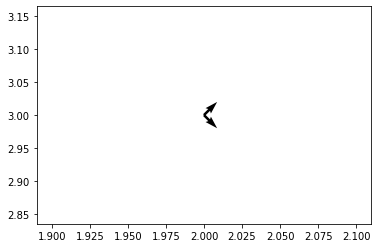

In [6]:
plt.quiver(2,3,1,-1)
plt.quiver(2,3,1,1)

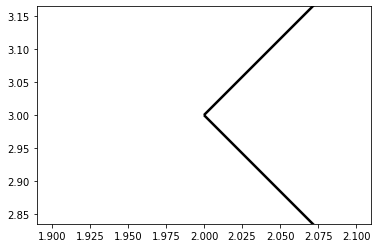

In [4]:
plt.quiver(2,3,1,-1,scale=1.0)
plt.quiver(2,3,1,1,scale=1.0)

Notice that matplotlib scales the arrow to a reasonable size, keeping only the direction. This can be changed (see the documentation above, or add `scale=1.0` after the fourth argument) but it tends to be useful to keep it on.

If we want to have multiple vectors we just need to specify their locations and componants. For example, edit the following code to plot vectors $v_1 = \langle 1,-1 \rangle$ at $(2,3)$ and $v_2 = \langle -1,2 \rangle$ at $(4,1)$.

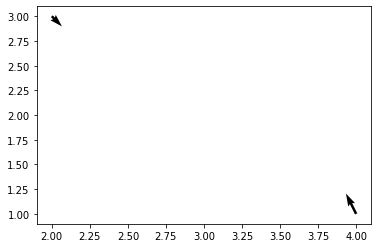

In [7]:
X = [ 2, 4]  # Vector of x - cordinates
Y = [ 3, 1] # Vector of y - cordinates
U = [ 1,-1]  # Vector of x - componants
V = [-1, 2] # Vector of x - componants

plt.quiver(X,Y,U,V)

In [ ]:
X = [ 2, 4]  # Vector of x - cordinates
Y = [ 3, 1] # Vector of y - cordinates
U = [ 1,-1]  # Vector of x - componants
V = [-1, 2] # Vector of x - componants

plt.quiver(X,Y,U,V)

### Vector fields along paths

Each path $\gamma(t) = (x(t),y(t))$ in $\mathbb{R}^2$ has a 1D vector field of vectors tangent to $\gamma$ given by
$$
\gamma'(t)  = \langle u(t),v(t)\rangle = \langle x'(t),y'(t)\rangle\,.
$$
We can plot the vector feild along the curve by plotting the curve and the quiver on the same axis. Let $\gamma(t) = (t^{-2},t^2)$, then $\gamma'(t) = \langle -2t^{-3},3t\rangle$. Try to plot the curve $\gamma(t)$ for $t = [1,4]$ using `plt.plot`. Recall that you can generate an array of $t$ values using `np.linspace`.

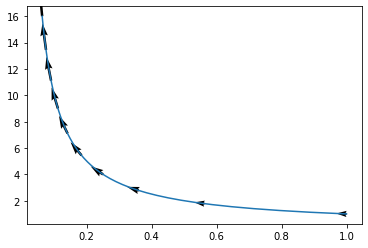

In [14]:
t = np.linspace(1,4)
x,y = [t**(-2),t**2]
plt.plot(x,y)

t = np.linspace(1,4,10)
x,y = [t**(-2),t**2]
U, V = [-2*t**(-3), 2*t]

plt.quiver(x,y,U,V,angles='xy')

In [ ]:
t = np.linspace(1,4)
x,y = [t**(-2),t**2]
plt.plot(x,y)

Now, add the quiver plot by plotting $\gamma(t)$ and $\gamma'(t)$, *read on once you get the vectors and curve roughly correct, you won't be able to get them exact for reasons detailed below*.

In [ ]:
t = 
X =
Y = 
U = 
V = 

plt.plot(X,Y)
plt.quiver(X,Y,U,V)

In [ ]:
t = np.linspace(1,4)
X = t**(-2)
Y = t**2
U = -2*t**(-3)
V = 2*t

plt.plot(X,Y)
plt.quiver(X,Y,U,V)

We seem to have a problem, none of our vectors are actually tangent to the curve... On closer inspection, you may notice that the angles of the vectors are being calulated without checking the units on the plot. A look through the documentation shows that the problem is `angle` flag is set to `uv`, so the angle of the vector is being calculated without using the $x$ and $y$ scale. Adding a flag

`plt.quiver(X,Y,U,V,angles='xy')`

will fix the scaling issue.

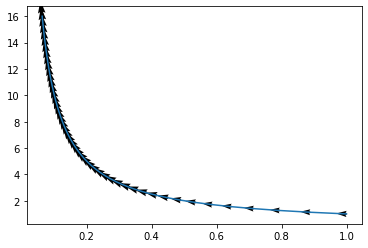

In [9]:
t = np.linspace(1,4)
X = t**(-2)
Y = t**2
U = -2*t**(-3)
V = 2*t

plt.plot(X,Y)
plt.quiver(X,Y,U,V,angles='xy')

#### Exercise
Plot the oval $\gamma(t) = (t^3-3t, 3t^2-9)$ and its derivative vector field for $t\in[-2.5,2.5]$. 

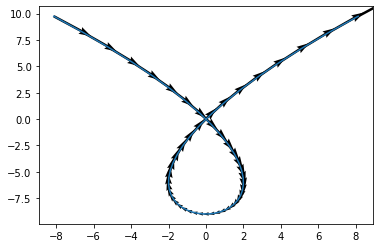

In [10]:
t = np.linspace(-2.5,2.5)
X = t**3-3*t
Y = 3*t**2-9
U = 3*t**2-3
V = 6*t

plt.plot(X,Y)
plt.quiver(X,Y,U,V,angles='xy')

### 2d Vector Fields: Discrete

Our interest is in visualizing the vector feild generated by a system of differential equations. This looks like a 2D array of vectors, defined at a 2d array of $X$ and $Y$ values. Matplotlib allow us to pass is a grid of $X$, $Y$, $U$ and $V$ values instead of just a list. Lets say we want vectors at $x = 1,2,3$ and $y = 4,5,6$. We will need a grid of 9 points

| - |(X,Y)| - |
|--|--|--|
|(1,6)|(2,6)|(3,6)|
|(1,5)|(2,5)|(3,5)|
|(1,4)|(2,4)|(3,4)|

so the `X` variable will be an array 

| - | X | - |
|---|---|---|
| 1 | 2 | 3 |
| 1 | 2 | 3 |
| 1 | 2 | 3 |

and the `Y` variable will be an array

| - | Y | - |
|--|--|--|
| 6 | 6 | 6 |
| 5 | 5 | 5 |
| 4 | 4 | 4 |

Python will generate these for us using the function `np.meshgrid(x,y)`. The `meshgrid` function takes a list of `x = [1,2,3]` of $x$ values and a list `y=[4,5,6]` of $y$ values and returns the grids above.

In [11]:
X, Y = np.meshgrid([1,2,3],[4,5,6])
print(X)
print(Y)
print(np.meshgrid([1,2,3],[4,5,6]))


(X[0,2],Y[1,2])

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]
[array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]]), array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])]


(3, 5)

x = [1,2,3]
y = [6,5,4]

X,Y = np.meshgrid(x,y)
print(X)
print(Y)

At each point $(x,y)$ we want to place a vector $\langle u,v\rangle$. That means we need to generate arrays `U` and `V` containing the $x$ and $y$ componants of the vectors at each location. Lets make a feild of vectors all pointing inwards:

|Vectors defined|at each point in|the grid above|
|:--:|:--:|:--:|
|$\langle 1,-1 \rangle$| $\langle 0,-1 \rangle$|$\langle -1,-1 \rangle$|
|$\langle 1,0 \rangle$| $\langle 0,0 \rangle$|$\langle -1,0 \rangle$|
|$\langle 1,1 \rangle$| $\langle 0,1 \rangle$|$\langle -1,1 \rangle$|

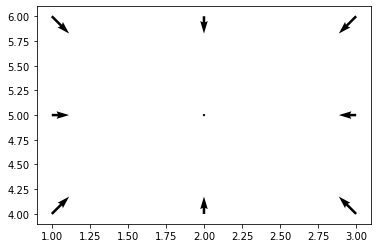

In [22]:
U = [[1,0,-1],
     [1,0,-1],   # Notice: you can use a line break as long as you havn't closed the array!
     [1,0,-1]]

V = [[-1,-1,-1],
     [0,0,0],
     [1,1,1]]

x = [1,2,3]
y = [6,5,4]

X,Y = np.meshgrid(x,y)

plt.quiver(X,Y,U,V)

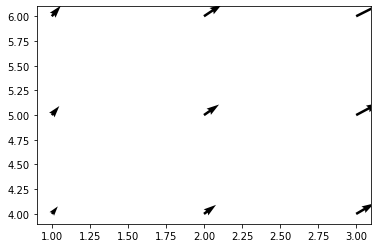

In [23]:
U = X*Y
V = X + Y

plt.quiver(X,Y,U,V)

### 2d Vector Fields from Differential Equations

We would like to genreate the 2d vector field assocaited to a pair of coupled differential equations. Given a system of equations, eg

\begin{align*}
x' &=  x+y
\\
y' &= xy-1
\end{align*}

we can compute vector $\langle u, v\rangle$ at the point $(x,y)$ to be $\langle u, v\rangle = \langle x+y,xy-1\rangle$. We will define a model `model(x,y)` as before and use the model to compute the vector componants `U` and `V` for each grid entry `X` and `Y`:

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

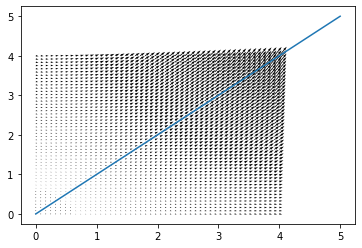

In [17]:
def model(Y,t):
    x,y = Y
    dYdt = [x+y, x*y-1]
    return dYdt

model([1,2], 0)

x = np.linspace(0,4)
y = np.linspace(0,4)
X, Y = np.meshgrid(x,y)

U, V = model([X,Y], 0)

t = np.linspace(0,5)
sol = odeint(model, t, [0,0])

plt.quiver(X,Y,U,V,angles='xy')
plt.plot(sol[0,:],sol[1,:])
sol[0,:]

We then define our grid using `np.meshgrid` and `np.linspace`. In this case, lets make a grid for $-4\leq x\leq 4$ and $-3\leq y\leq 3$ with 20 grid points in each direction. Complete the code below to produce the meshgrid 

In [14]:
x = np.linspace(-4, 4)
y = np.linspace(-3, 3)

X,Y = np.meshgrid(x,y)

In [18]:
x = np.linspace(-4,4,20)
y = np.linspace(-3,3,20)

X,Y = np.meshgrid(x,y)

Finally, we use our model to compute the vectors `U` and `V`. The funcion `model` takes a vector [x,y] and returns a vector [x,y]. That means we must pass it `[X,Y]` and then load the result into `[U,V]`. The function `model` doesn't actaully use `t` but we must supply it with a value, so we choose `t=0`:

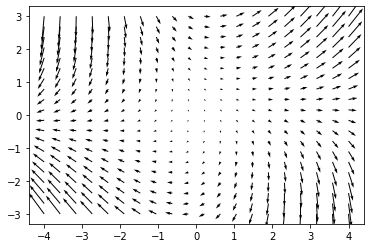

In [19]:
U, V = model([X,Y],0)

plt.quiver(X,Y,U,V,angles='xy')

#### Excerise:  

Modify the code above to plot the *unit vector* in the direction of $\langle u,v\rangle$ but dividing `U` and `V` by $||\langle u,v\rangle|| = \sqrt{u^2 + v^2}$. Remember that you can use `np.sqrt()` as a square root funtion. 

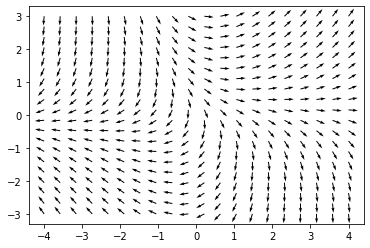

In [21]:
Un = U/np.sqrt(U**2+V**2)
Vn = V/np.sqrt(U**2+V**2)
plt.quiver(X,Y,Un,Vn,angles='xy')

### 2d Vector Fields from Differential Equations: Adding Numerical Solutions

Finally, lets combine the phase plane vector plot with the solution plot for the differential equation above. We will define `XMIN`, `XMAX`, `YMIN` and `YMAX` as the maximum and minimum values for $x$ and $y$ respectivly. Finally, recall that for `odeint` we need to specify a starting point `XY0=[X0,Y0]` coresponding to the initial value $(x_0,y_0)$ and a time vector $t$. We will start with $t\in [0,2]$ and initial value $(x_0,y_0) = (-1,2)$:

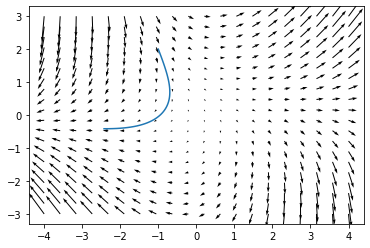

In [22]:
def model(XY,t):
    x,y = XY
    dYdt = [x+y, x*y-1]
    return dYdt

XMIN =-4
XMAX = 4
YMIN =-3
YMAX = 3

x = np.linspace(XMIN,XMAX,20)
y = np.linspace(YMIN,YMAX,20)

X,Y = np.meshgrid(x,y)
U,V = model([X,Y],0)

XY0 = [-1,2]
t = np.linspace(0,2)

XYSol = odeint(model, XY0, t)

plt.quiver(X,Y,U,V,angles='xy')
plt.plot(XYSol[:,0],XYSol[:,1])

#### Exercise:

Copy and paste the code above into the cell below and modify it trace out the solutions starting at (0,1), (0,0) and (1,0). Can you plot all four on the same chart? 

#### Exercise:

Plot the solution starting at (2,1). What must you modify to get a reasonable plot? Why may this make it difficut to plot a chart of all the trajectories?

### Application: Competing Species Model
Lets view the vectorfeild phase space for the competing species model:
\begin{align}
X' &= X(b_1  -c_1Y - d_1 X)
\\
Y' &= Y(b_2 - c_2X - d_2 Y)
\end{align}
for Gause's experiments with yeast. Gause supplied the following parameter values

|Param.| Value|
|--|--|
|$b_1$|0.22|
|$b_2$|0.061|
|$c_1$|0.053|
|$c_2$|0.0046|
|$d_1$|0.017|
|$d_2$|0.010|

Plot the phase space vector field from 0 to 10 in both $x$ and $y$ and the solutions starting at (1,1), at (20,5) and at (10,20).

## Case Study: Compitition, predation and diversity

Consider the compition model where 

|Param.| Value|
|--|--|
|$b_1$|0.3|
|$b_2$|0.2|
|$c_1$|0.06|
|$c_2$|0.05|
|$d_1$|0.01|
|$d_2$|0.01|

Plotting this model we find that these species are incompatable but one is not better than the other, that depending on the starting conditions either $X$ or $Y$ will die out, but it could be either. 

We want to simulate adding a preditor into this sitution. We modify the differential equation as follows:

\begin{align}
X' &= X(b_1  -c_1Y - d_1 X -p_1Z)
\\
Y' &= Y(b_2 - c_2X - d_2 Y - p_2Z)
\\
Z' &= Z(-d_3 + a_1X + a_2 Y)
\end{align}

Assume the levels or predation are equal:

# Homework:

## Analytic Problem 1: (3 Points)

Consider the preditor prey equations where the prey population has a carrying capacity:

\begin{align}
X' &= aX\left(1-\frac XK\right) - c_1 XY\,,
\\
Y' &= c_2 XY - bY\,.
\end{align}

1.a) Write down expressions for the nullclines and the equilibrium solutions. 

1.b) There are two rough cases depending on the parameters: All equilibrium solutions lie in the model domain $X,Y\geq 0$ or one does not. Draw the trajectory diagram for both cases, including the nullclines.

1.c) Compute the Jacobian matrix. 

1.d) Argue, using either the matrix or the trajectory diagrams, for the type of the equilibrium solutions.

## Case Study: Geese defy mathematical conventions?

*In this case study, we will consider how to evaluate models with large numbers of parameters by using the nullclines and focusing on one parameter at a time. For large numbers of parameters the space of solutions may be complicated, but we can still try to understand what effect new terms have by focusing on the rough behavior of the nullclines, or by fixing all but single parameter of interest.*

Classical exploitation theory has lead us to believe that where more grazing is available we will find more herbivores inflicting more pressure on the crops, thus keeping crop growth controlled. In <a href=” https://esajournals.onlinelibrary.wiley.com/doi/pdf/10.2307/2265498”>van de Koppel et al</a>, the authors argue that herbivores do not control the plant growth entirely. 

Their model, supported by empirical evidence, include the possibility of dense vegetation persisting with low herbivore grazing pressure, all in the absence of a predator. The observation of this maximal grazing pressure on large number of crops can be explain in a variety of ways. For example, in denser regions lack of light may impact stem development of plants, robbing the leaves of their protein content and making them less attractive to herbivores. Alternatively, these regions may be under watch by the few predators in the system, or herbivores may have greater difficulty penetrating them. 

Let $P$ and $H$ be the plant and herbivore densities respectively, with $P$ measure plant mass in $g/m^2$ and $H$ measuring  the number of herbivores per unit area in $num/m^2$ calculated from the number of droppings found. The standard form of the plant herbivore model is 

\begin{align}
P’ &= G(P) – F(P)H
\\
H’ &= N(P)H
\end{align}

Where $G(P)$ is the growth function, $F(P)$ is the per capita consumption rate of a herbivore and $N(P)$ is the per-capita growth rate of herbivores. 

Consider the first case of reduced digestion efficiency due to less nutritional forage in high density crops. Here, we take the per capita growth rate to decline in regions of high plant density. Let $P^*_1$ be the crop density under which there is too little food and herbivore growth is 0. Let $P_2^*$ to be the density above which there is too much vegetation and herbivore growth is again 0.

They propose the following model

\begin{align}
P’ &= rP(1-P/K) – c_{max} \frac{P}{a+P} H
\\
H’ &= \left( e_{max}\frac{P}{a+P}  e^{-bP} - d \right)H
\end{align}

**1 Point for each of the following Questions**

#### Question 1:
Give a plausible interpretation of the constants $d$, $a$, $c_{max}$. These are all term’s we have discussed before. 

*Put your answer here*

---

We will be working around the parameter values

|$K$|$r$|$a$|$b$|$c_{max}$|$e_{max}$|$d$|
|--|--|--|--|--|--|--|
|18|1|10|0.065|1|0.4|0.1|

#### Question 2:
Let us take a moment to understand the functios $N(P)$ and $F(P)$. Plot $N(P)$ vs $P$ and $F(P)$ vs $P$ for $P\in  [0,15]$.

Use either the plots or the vectors to estimate the zeros of $N(P)$ up to 2 decimal places. These will be the nullclines assocaited to $H' = 0$. 

---

#### Question 3:

We are interested in discovering the long term behavior of this model: are there parameters for which the plant-herbivore system settle into coexistance, or do the herbavores always eventually die out? 

Plot the vector feild associted to the plant-herbivore equations at the parameter values specified above, for $P,H\in [0,15]$. 

#### Analytic Question 4:

4.a) Write down the 4 analytic equations for the distinct nullclines for system of equations. Using the numerical values you estimated in **Question 2**, give the equilibrium solutions to the system of equations for the given parameter values. 

4.b) Add these to your plot from  **Question 3**. Compute the numerical solutions to the system of equations starting at $(P,H) = (10,13)$ and $(P,H) = (15,11)$ and plot them with the phase space vector field and the nullclines.

#### Question 5: Changin the Plant Carrying Capacity

Consider the plant carrying capacity $K$ as a variable parameter while holding all other parameters fixed. Copy your code from **Question 5** and plot the resulting diagram for $K = 5, 10, 20$ and 24. You should use 4 subplots to summarize your results, and clearly label the plots. 

---

#### Analytic Question 7:

Fix all of the constants except $K$ as in **Question 2**. Compute the stability type of the leftmost equilibrium point by giving an expression for the Jacobean (this is tedious but not difficult) and computing it at the equilibrium point. Then, use the trace-determinant plane (or the eigenvalues directly) to determine when the point is stable, unstable, or semistable and when it is a node or a focus. You should give each range in terms of $K$. 

*Hint: In the expression for $\Delta$ in the trace determinant plane, it might be helpful to solve in terms of $L = 1/K$, not $K$ directly.*

*Hint: This computation can be done by hand, but by now I don't need to test you're ability to do complex partial derivatives. I would highly recommend using sympy for this problem. 

https://docs.sympy.org/latest/tutorial/intro.html

Solution:

Using sympy:

In [42]:
from sympy import *

x, t, z, nu = symbols('x t z nu')

Matrix([((x**2 + x + t)*x), t*x+nu]).diff(nu)

Matrix([
[0],
[1]])

#### Question 8:

Summarize how the solutions, and overall behavior of the model chances for changes for changing $K$. Give distinct phases of the model in terms of $K$ and describe the types of behavior in each phase. You're results should be justified by the stability of the equilibrium solutions from your numerical simulations. 